# Introduction

Given a dataset of potato leaf images, the objective is to create a machine learning model capable of accurately classifying these images into various disease categories. This model aims to assist farmers in promptly identifying and treating diseased potato plants, ultimately enhancing crop yield and minimizing losses

In [1]:
import numpy as np
import os
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings(action='ignore')

2024-07-26 10:08:52.806179: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-26 10:08:52.806311: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-26 10:08:52.962733: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
# Set Constants
BATCH_SIZE=32
IMAGE_SIZE=256
CHANNELS=3
EPOCHS=50

In [3]:
# lOAD THE DTASET

dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/kaggle/input/potato-leaf-disease-dataset/Potato Leaf Disease Dataset in Uncontrolled Environment",
    seed=58,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 3076 files belonging to 7 classes.


In [4]:
len(dataset)

97

In [5]:
class_names=dataset.class_names
class_names

['Bacteria', 'Fungi', 'Healthy', 'Nematode', 'Pest', 'Phytopthora', 'Virus']

# Visualizting the data

In [6]:
def get_all_labels(ds):
    labels=[]
    for image_batch, labels_batch in ds:
        labels.extend(labels_batch.numpy())
    return labels

In [7]:
labels=get_all_labels(dataset)
# Count the occurences of each class
class_counts = {class_name: 0 for class_name in class_names}
for label in labels:
    class_counts[class_names[label]]+=1

In [8]:
# Plot the pie chart
import plotly.express as px
import pandas as pd
df = pd.DataFrame(list(class_counts.items()), columns=['Class', 'Count'])
fig = px.pie(df,values='Count', names='Class', title='Proportion of Each Observed Category', hole=0.3, width=500, height=500)
fig.show()

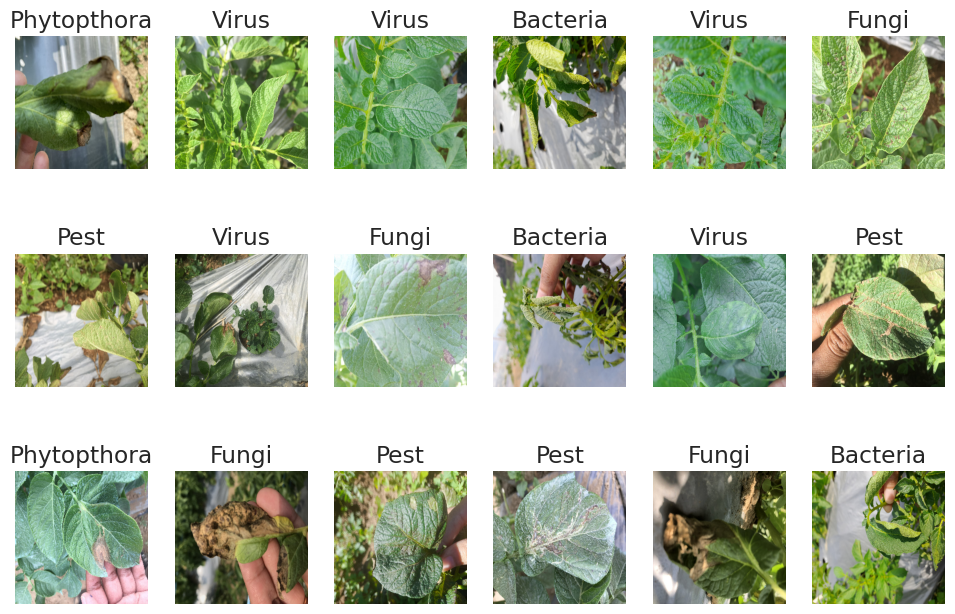

In [9]:
plt.figure(figsize=(12, 8))
for image_batch, labels_batch in dataset.take(1):
    for i in range(18):
        ax = plt.subplot(3,6, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

# Credit:

https://www.kaggle.com/code/nourhanwael7/potato-leaf-diseases-acc-92/notebook